## face resembalance project
- 나랑 닮은 연에인 찾기


- 자신의 사진과 나와 닮았다고 생각했던 연예인 사진을 임베딩 벡터간의 거리를 이용해 얼마나 닮았는지 구하기


---
### 이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라서 리턴해주는 함수

In [25]:
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np

def get_gropped_face(image_file):
    # 이미지 가져와서 얼굴 부분 찾기
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    # 이미지에서 얼굴 영역의 좌표만 crop한다.
    
    return cropped_face

---
### images 디렉토리 내부의 이미지 파일들 가져오기
- 연예인 사진, 내 사진 가져오기

In [207]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/face_resembalance/my'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['my2.jpg', 'my1.jpg']


#### 내 얼굴 사진 끼리 얼굴 임베딩 벡터 거리 구하기

In [208]:
# 내 사진 가져와서 얼굴 임베딩 구하기
import face_recognition

my_embedding_dict = dict()
for file in file_list :
    image_path = os.path.join(dir_path, file)
    name = file.split('.')[0]  # 파일 .jpg 제외한 이름 부분 가져오기
#    print("fiel : ", file)
    face = get_gropped_face(image_path)  # 얼굴 crop
    embedding = face_recognition.face_encodings(face)
    if len(embedding) > 0:
        print(file,"인식 완료")  # 얼굴 영역 face가 제대로 detect되었는지 확인
        my_embedding_dict[name] = embedding[0]

my2.jpg 인식 완료
my1.jpg 인식 완료


In [28]:
my_embedding_dict["my1"]

array([-6.02181032e-02,  1.48188770e-01,  2.11974792e-02, -7.60399401e-02,
       -1.34597585e-01,  2.67603006e-02, -9.67243612e-02, -1.14429958e-01,
        8.16320479e-02, -9.42038894e-02,  2.12542415e-01, -2.68175155e-02,
       -2.45929211e-01, -1.12787351e-01, -7.58799762e-02,  1.88625529e-01,
       -1.35014296e-01, -1.76913008e-01, -2.42179334e-02,  9.94056463e-05,
        1.26862198e-01,  8.63934979e-02,  2.61525810e-03,  2.12919749e-02,
       -1.18822344e-01, -2.72267669e-01, -6.53168857e-02, -1.16129601e-02,
        9.07817204e-03, -8.14448223e-02, -5.62451929e-02,  7.29633644e-02,
       -2.06750482e-01, -1.11844745e-02,  7.33097494e-02,  1.12257585e-01,
       -2.30585299e-02, -6.41112328e-02,  1.31692007e-01, -2.74747815e-02,
       -2.25196064e-01,  6.46968186e-02,  8.08792040e-02,  2.47703180e-01,
        1.81103110e-01, -2.54774392e-02, -2.30927020e-04, -1.56617612e-01,
        7.52118155e-02, -1.23290196e-01,  4.98260707e-02,  2.03418568e-01,
        8.08561444e-02,  

#### 내 사진으로 얼굴 임베딩 거리 구하기

In [29]:
# 다르게 찍은 2 사진을 가지고 비교 했을때 거리차이가 크게 나지 않아서 
# 인식이 잘 된것을 확인할 수 있다.
np.linalg.norm(my_embedding_dict["my1"]-my_embedding_dict["my2"], ord=2)

0.20851617812467363

#### 연예인 사진 가져오기
- 나랑 비슷하다가 들었던 연예인(박지성) + 안비슷하지만 궁굼해서 가져온 사진들


In [30]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/face_resembalance/celebrity'
file_list = os.listdir(dir_path)
print ("file_list: {}".format(file_list))

file_list: ['박지성.jpg', '강동원.jpg', '안재현.jpg', '유해진.jpg', '류준열.jpg']


#### 연예인 얼굴영역 crop + PIL image 변환
- 이미지의 얼굴 영역을 get_gropped_face로 얼굴만 뽑은 후 PIL image로 저장 

In [31]:
# 연예인 사진 가져와서 얼굴 임베딩 구하기
import face_recognition
from PIL import Image

celebrity_embedding_dict = dict()
save_path  = os.getenv('HOME')+'/aiffel/face_embedding/face_resembalance/pil_image'

for file in file_list :
    image_path = os.path.join(dir_path, file)
    name = file.split('.')[0]  # 파일 .jpg 제외한 이름 부분 가져오기
#    print("fiel : ", file)
    face = get_gropped_face(image_path)  # 얼굴 crop
    embedding = face_recognition.face_encodings(face)

# PIL Image로 변환 후 저장
    pillow_image = Image.fromarray(face)
    pillow_image.save(save_path+"/"+file)  # save_path 위치에 file 저장

    if len(embedding) > 0:
        print(file,"인식 완료")  # 얼굴 영역 face가 제대로 detect되었는지 확인
        celebrity_embedding_dict[name] = embedding[0]

박지성.jpg 인식 완료
강동원.jpg 인식 완료
안재현.jpg 인식 완료
유해진.jpg 인식 완료
류준열.jpg 인식 완료


- 내 사진도 PIL Image로 변환 후 해당 폴더에 저장

In [33]:
my_img_path = os.getenv('HOME')+'/aiffel/face_embedding/face_resembalance/my/my1.jpg'
face = get_gropped_face(my_img_path)

# PIL Image로 변환 후 저장
pillow_image = Image.fromarray(face)
pillow_image.save(save_path+"/my.jpg")
print("내 사진 pil image로 변환 후 저장 완료")

내 사진 pil image로 변환 후 저장 완료


### 얼굴 영역의 임베딩 추출
pil Image에 있는 crop된 이미지 face_recognition을 사용해서 이미지를 불러오고 임베딩 추출하고  
다른 사람의 임베딩을 구분할 수 있도록 dict로 구성


- def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수


- def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [34]:
def get_face_embedding(face):  
    # 얼굴 영역이 들어오면 해당 영역으로부터 임베딩 벡터를 구한다.
    return face_recognition.face_encodings(face) 

In [97]:
def get_face_embedding_dict(dir_path):
    face_file_list = os.listdir(dir_path)  # 디렉터리로부터 가져온 사진 리스트
    face_embedding_dict = dict()

    for file in face_file_list :
        name = file.split('.')[0]  # .jpg 확장자 부분을 제외한 이름 부분 가져오기
        face = face_recognition.load_image_file(dir_path+"/"+file) #  img file load
        # PIL image로 얼굴 부분만 crop을 이미 진행했기 때문에 추가로 get_gropped_face
        # 함수를 사용해서 얼굴 영역을 crop할 필요가 없다
        embedding = get_face_embedding(face)
        face_embedding_dict[name] = embedding[0]
    return face_embedding_dict


In [98]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/face_resembalance/pil_image'
face_file_list = os.listdir(dir_path)
for file in face_file_list :
    print(file)

박지성.jpg
강동원.jpg
안재현.jpg
유해진.jpg
류준열.jpg
my.jpg


In [99]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict["박지성"][:20]  # 임베딩 값이 잘 들어왔는지 확인

array([-0.05683783,  0.1124519 ,  0.01707495, -0.0530763 , -0.11250877,
        0.00261437, -0.10754085, -0.11388507,  0.06573532, -0.06338134,
        0.22675507, -0.01139414, -0.22481744, -0.12996632, -0.07345424,
        0.2074824 , -0.15276855, -0.17594178, -0.04440374,  0.0231357 ])

### 닮은꼴 연예인 찾기

- PIL Image로 변환한 이미지들 중에서 가장 벡터들간의 거리가 작은 연예인이 누군지 찾아보자

- get_nearest_face(name, top=5) 함수 사용
   - 이름이 들어왔을때 얼굴의 임베딩 벡터를 근접한 순으로 정렬해서 보여주는 함수

---

#### 얼굴임베딩 사이의 거리측정

- get_distance() 함수는 인자로 파일명의 사람 이름 2개를 받아서, 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 형태이다.

In [39]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

#### 거리 비교 함수 생성
  - get_sort_key_func() A를 디폴트로 두고 나머지 사진들을 가지고 거리를 비교하는 함수   
  
  
  - sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    - 거리를 비교할때 닮은 순으로 오름차순 정렬해서 출력 

In [42]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 이렇게 생성된 함수 sort_key_func는 sort_key_func('') 라고 호출할 때 
# 저와 박지성 사이의 임베딩 벡터 거리를 계산합니다.

sort_key_func = get_sort_key_func('my')   

- 닮은꼴 순서로 정렬해주는 sorted 코드

``` python
# 딕셔너리를 오름차순 정렬, 정렬 기준을 trump와의 임베딩 벡터 거리 함수로 이때 lambda 함수가 정렬 key로 활용
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
```

In [130]:
# name 인자에 특정 사람 이름을 주면 그 사람과 가장 닮은 다른 이미지와 
# 거리 정보를  가장 가까운 순으로 정렬해서 표시
def get_nearest_face(name, top=5):

    sort_key = get_sort_key_func(name)
    sorted_face = sorted(embedding_dict.items(), key=lambda x:sort_key(x[0]))
    
    for i in range(top+1):
        if i ==0 :  # 첫번째로 나오는 이름은 자기 자신일 가능성이 크므로 제외
            continue 
        if sorted_face[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_face[i][0], sort_key(sorted_face[i][0])))
        

In [210]:
# 연예인 사진과 나 비교
get_nearest_face('my')

순위 1 : 이름(박지성), 거리(0.3479768519597209)
순위 2 : 이름(류준열), 거리(0.366020095392382)
순위 3 : 이름(유해진), 거리(0.48532544840871555)
순위 4 : 이름(안재현), 거리(0.4909993655984385)
순위 5 : 이름(강동원), 거리(0.518890783889069)


In [48]:
# 다르게 찍은 2 사진을 가지고 비교 했을때 거리차이가 크게 나지 않아서 
# 인식이 잘 된것을 확인할 수 있다.
np.linalg.norm(my_embedding_dict["my1"]-my_embedding_dict["my2"], ord=2)

0.20851617812467363

- 내 사진의 결과가 0.2임을 생각했을때 내 사진이 1,2위 하고는 꽤 비슷하다고 볼 수 있다.

--- 

### 한번 해보는 소속사 별 가장 높은 닮은꼴
- SM, YG, JYP의 소속 가수 중 어디가 나와 조금이라도 비슷한 사람들이 있는지 한번 찾아보자

- 사진의 개수는 대략 15개 정도를 기준으로 진행하였다.

#### 1. SM 사진 가져온 후 임베딩하기

In [49]:
# 이미지 디렉터리 경로가 들어오면 해당 디렉터리 별 이미지를 crop하고 임베딩 한 
# dict를 반환한다.
def get_face_embedding_crop_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list :
        name = file.split('.')[0]  # 
        img_path = os.path.join(dir_path, file)

        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            #embedding_dict[os.path.splitext(file)[0]] = embedding[0] # 해당 코드도 같은 내용이다.
            embedding_dict[name] = embedding[0]
    return embedding_dict

In [75]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/face_resembalance/SM'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['시원.jpeg', '김희철.jpeg', '수호.jpeg', '동해.jpeg', '규현.jpeg', '찬열.jpeg', '마크.jpeg', '지성.jpeg', '온유.jpeg', '디오.jpeg', '려욱.jpeg', '예성.jpeg', '종현.jpeg', '쟈니.jpeg', 'Key.jpeg', '첸.jpeg', '최강창민.jpg', 'my.jpg']


In [76]:
embedding_dict = get_face_embedding_crop_dict(dir_path)
#sm_embedding_dict["규현"]

#### SM 소속 연에인 임베딩 거리

In [77]:
# 거리가 가까울 수록 (값이 작을수록) 더 비슷하다는 의미의다. 
get_nearest_face('my')

순위 1 : 이름(온유), 거리(0.4123374270123881)
순위 2 : 이름(Key), 거리(0.4334533960783545)
순위 3 : 이름(지성), 거리(0.44774100602605205)
순위 4 : 이름(규현), 거리(0.46262286027216065)
순위 5 : 이름(마크), 거리(0.4762496929775653)


---
#### 2. YG 사진 가져온 후 임베딩하기

In [78]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/face_resembalance/YG'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['소정환.jpeg', '김진환.jpeg', '송윤형.jpeg', '아사히.jpeg', '송민호.jpeg', '방예담.jpeg', '정찬우.jpeg', '요시.jpeg', '강승윤.jpeg', '지훈.jpeg', '김진우.jpeg', '은지원.jpeg', '이승훈.jpeg', '박정우.jpeg', 'my.jpg', '김동혁.jpeg']


In [79]:
embedding_dict = get_face_embedding_crop_dict(dir_path)

#### YG 소속 연에인 임베딩 거리

In [80]:
 get_nearest_face('my')

순위 1 : 이름(김진환), 거리(0.44186567775455093)
순위 2 : 이름(요시), 거리(0.5079892177761706)
순위 3 : 이름(지훈), 거리(0.5295128137124054)
순위 4 : 이름(김진우), 거리(0.5393149186673448)
순위 5 : 이름(송윤형), 거리(0.5423958814155011)


---
#### 3. JYP 사진 가져온 후 임베딩하기

In [67]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/face_resembalance/JYP'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['원필.jpeg', '현진.jpeg', '아이엔.jpeg', '필릭스.jpeg', '우영.jpeg', '버나드_박.jpeg', '김동희.jpeg', '준호.jpeg', '닉쿤.jpeg', '리노.jpeg', '찬성.jpeg', '성진.jpeg', '창빈.jpeg', '윤박.jpeg', 'my.jpg']


In [68]:
embedding_dict = get_face_embedding_crop_dict(dir_path)

#### JYP 소속 연에인 임베딩 거리

In [69]:
 get_nearest_face('my')

순위 1 : 이름(버나드_박), 거리(0.41828187006640954)
순위 2 : 이름(우영), 거리(0.4197382150001217)
순위 3 : 이름(찬성), 거리(0.48124824526228005)
순위 4 : 이름(준호), 거리(0.5012910153129719)
순위 5 : 이름(윤박), 거리(0.5024442951015932)


--- 
#### SM 소속사에서 5순위 내로 모든 임베딩 거리가 0.5이하이다.
- 그나마 비슷한 연예인들이 소속된 곳은 SM이다.

- 임베딩 거리 평균적으로 짧은 순위 
  1. SM
  2. JYP
  3. YG
  
  
- 임베딩 거리가 가장 가까운 연예인
  - SM : 온유

---

In [131]:
# 닮은꼴 연예인[3순위 까지] 사진과 나 비교 
get_nearest_face('my')

순위 1 : 이름(박지성), 거리(0.3479768519597209)
순위 2 : 이름(류준열), 거리(0.366020095392382)
순위 3 : 이름(유해진), 거리(0.48532544840871555)
순위 4 : 이름(안재현), 거리(0.4909993655984385)
순위 5 : 이름(강동원), 거리(0.518890783889069)


### 닮은꼴 연예인 결론
축구선수 포함 연예인중 가장 가까운 거리는 **박지성**이고 축구선수를 제외할 경우  
**류준열**하고 가장 가깝다.

---
### 위의 결과로 다양한 시각화 해보기


---
모델이 나와 비슷하다고 생각하는 연예인 위에서부터 4명을 웹페이지로 띄워서 출력해보자.

- 연예인 사진 결과 : 박지성 선수하고 배우 류준열씨는 0.4이하의 거리를 나타냈고 \
배우 유해진씨의 경우는 0.48,  배우 안재현씨는 0.49로 4분 모두 0.5이하 거리를 나타낸다.  


- 인식하는데 사용한 4분의 이미지를 **flask**를 활용하여 웹페이지의 테이블 형태로 띄워준다.

In [227]:
# name 인자에 특정 사람 이름을 주면 그 사람과 가장 닮은 다른 이미지와 
# 거리 정보를  가장 가까운 순으로 정렬해서 표시
def get_nearest_face_name(name, top=5):

    sort_key = get_sort_key_func(name)
    sorted_face = sorted(embedding_dict.items(), key=lambda x:sort_key(x[0]))
    sorted_name =[]
    for i in range(top+1):
        if i ==0 :  # 첫번째로 나오는 이름은 자기 자신일 가능성이 크므로 제외
            continue 
        if sorted_face[i]:
            sorted_name.append( sorted_face[i][0] ) 
            # 입력된 사람의 얼굴과 더 비슷한 순서로 리스트에 쌓인다.
    return sorted_name

In [228]:
# 닮은꼴 연예인[4순위 까지] 사진 웹 페이지로 확인해보기!
get_nearest_face('my')

순위 1 : 이름(박지성), 거리(0.3479768519597209)
순위 2 : 이름(류준열), 거리(0.366020095392382)
순위 3 : 이름(유해진), 거리(0.48532544840871555)
순위 4 : 이름(안재현), 거리(0.4909993655984385)
순위 5 : 이름(강동원), 거리(0.518890783889069)


In [230]:
# 나와 얼굴이 비슷핟 경우 웹페이지의 순위별로 이미지 출력되게 하자
_names = get_nearest_face_name('my')
for n in name_[:4]:    # 나와 비슷한 4인
    print(n)

print("웹페이지의 이미지를 올릴 분들  _name :", _name[:4])

박지성
류준열
유해진
안재현
웹페이지의 이미지를 올릴 분들  _name : ['박지성', '류준열', '유해진', '안재현']


In [233]:
# _names로 받은 이름들을 이미지 파일 확장자 형식에 맞게 매핑하는 코드
name = list(map(lambda x:"image/"+x+".jpg" , _names) )[:4]
name

['image/박지성.jpg', 'image/류준열.jpg', 'image/유해진.jpg', 'image/안재현.jpg']

4개의 이미지 경로 준비를 완료 했으니 flask를 가져와 서버를 만듭시다.

- flask에서 image의 경로는 static 폴더 내부로 지정한다. 
- **html**에서 **static**을 동적으로 구동 했으니 static 부분은 빼고 이미지 경로를 적어서 사용하면 된다.


#### Flask 서버 작성

- Flask를 서버로 사용할때 파일 들의 위치 구조를 아래와 같은 형식으로 지정해야 한다.


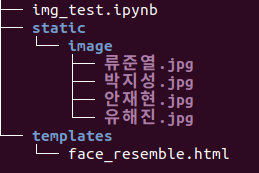

- html을 동작시킬 **파이썬 파일**을 가장 위에 
- image 파일은 **static** 폴더 내부의 생성
- html 파일은 **templates** 폴더 내부로 지정한다.

In [239]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route("/")
def index():

    #name_ = get_nearest_face_name('my')[0] # 가장 비슷한 사람만 할 경우
    #face_img_path = "img/"+ name_[0]+".jpg" 
                        # 비슷한 연예인 이름을 이미지 파일 위치로 사용하기 위한 코드

    names = list(map(lambda x:"image/"+x+".jpg" , _names) ) # 이름 뒤에 확장자면 붙이기
    return render_template('face_resemble.html', names = names)

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Feb/2021 21:21:50] "GET / HTTP/1.1" 200 -


#### 위의 코드 실행시 다음과 같은 결과가 웹 페이지에 출력이 된다.   ####

--- 

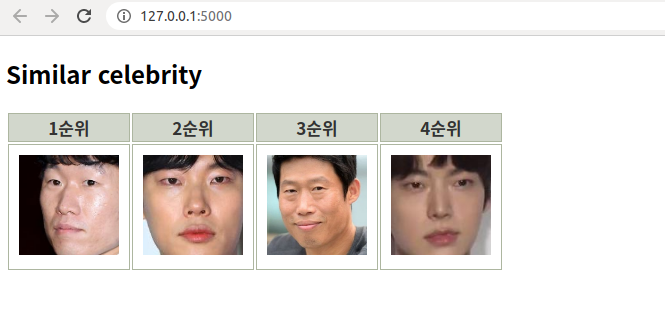


---
### 회고

- 어렸을때 부터 얼굴이 박지성 느낌 난다는 얘기를 많이 들었는데 모델이 판단했을때 박지성과 저의 얼굴이 비슷하다고 해서 놀랐습니다. 스스로도 닮긴 닮았구나 생각을 했지만, 컴퓨터 마저 닮았다고 하니 이제 어디가서 닮은 연예인 얘기할 때 박지성과 닮았다고 얘기하면될 것 같네요.


- 그리고 1,2까지는 그래도 몇번 들어봤엇고 유해진은 박지성 닮은꼴이라 많이 얘기를 해서 모델에 넣어봤는데 모델도 0.48로 어느정도 흡사하다고 모델이 얘기를 하네요.  
솔직히 4부터는 닮았었으면 했지만 그래도 0.5이하의 유사도를 가졌으니 하위호환 이라고 생각하고 만족하게 프로젝트를 즐긴것 같습니다.


- SM, TG, JYP 등의 소속 연예인들과도 비교를 하긴 했지만 그 얘기까지 하면 안될것 같아서 비슷한 연예인 얼굴 얘기는 여기까지로 하겠습니다.


- 그리고 프로젝트 하면서 생각난 거지만 엤날에 잠깐 유행했던 "나와 비슷한 연예인 찾기" 어플 했을때도 1번째인 박지성 선수와, 2번째인 류준열 배우가 떳긴 했는데, 이번에 직접 하면서도 비슷한 결과가 나와서 옛날 생각이 잠깐 났엇네요. <br> 그때 다른 연예인도 뜨긴 했지만 이것도 위의 소속 연예인들과 마찬가지로 이름을 못꺼내겠네요. 


- 이번 프로젝트는 시각적인 부분도 있고 실제 결과도 예상했었던 결과랑 큰 차이가 없어서 신기하면서도 재밌게 했던것 같습니다.